In [1]:
library(Seurat)
library(dplyr)
library(patchwork)
library(ggplot2)
library(RColorBrewer)
library("wesanderson")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
nuclei <- readRDS("raw_adata_afterDB_SoupX_colomns_added.rds")

In [4]:
#Use the below pipeline and run a preliminary test using 1000 as cut off to get rid of low quality nuclei, choose 5000 highly variable genes, k.param = 30 and dims = 25 and save the RDS
nuclei.integrated <- readRDS("nuclei.integrated_1000_5000_35_25.rds")

In [5]:
Idents(object = nuclei.integrated) <- 'integrated_snn_res.0.02'
neuron_cluster <- c(0,3,7,9)
neuron_all <- subset(nuclei.integrated, idents = neuron_cluster)
neuron_LowQuality <- subset(neuron_all, subset = nFeatures_RNA <= 3000)
#get rid of low quality neuron cells
'%!in%' <- function(x,y)!('%in%'(x,y))
nuclei <- subset(nuclei, subset = cell.id %!in% as.numeric(unname(neuron_LowQuality$cell.id)))

In [6]:
str(nuclei)

Formal class 'Seurat' [package "Seurat"] with 13 slots
  ..@ assays      :List of 1
  .. ..$ RNA:Formal class 'Assay' [package "Seurat"] with 8 slots
  .. .. .. ..@ counts       :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:211246941] 29 33 35 51 58 63 64 70 71 75 ...
  .. .. .. .. .. ..@ p       : int [1:69606] 0 4333 6777 8620 9389 12357 17147 19664 20983 26249 ...
  .. .. .. .. .. ..@ Dim     : int [1:2] 31258 69605
  .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. ..$ : chr [1:31258] "CICP27" "AP006222.1" "MTND1P23" "MTND2P28" ...
  .. .. .. .. .. .. ..$ : chr [1:69605] "AAACCCAAGAGCGACT-1-0" "AAACCCACAAATACAG-1-0" "AAACCCACAAGGTTGG-1-0" "AAACCCACACGTTCGG-1-0" ...
  .. .. .. .. .. ..@ x       : num [1:211246941] 0.773 3.436 0.655 1.841 0.653 ...
  .. .. .. .. .. ..@ factors : list()
  .. .. .. ..@ data         :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:211246941] 29 33 3

Warning message in SingleExIPlot(type = type, data = data[, x, drop = FALSE], idents = idents, :
“All cells have the same value of percent.mt.”


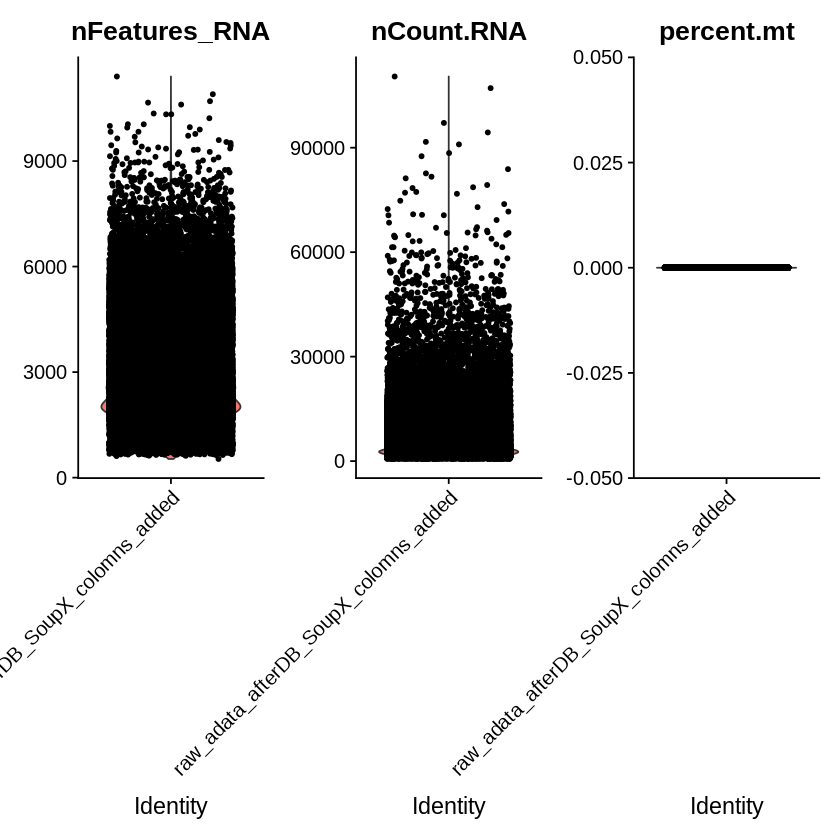

In [7]:
VlnPlot(nuclei, features = c("nFeatures_RNA","nCount.RNA", "percent.mt"), ncol = 3)

In [8]:
nuclei <- subset(nuclei, subset = nFeatures_RNA > 1000)

In [9]:
str(nuclei)

Formal class 'Seurat' [package "Seurat"] with 13 slots
  ..@ assays      :List of 1
  .. ..$ RNA:Formal class 'Assay' [package "Seurat"] with 8 slots
  .. .. .. ..@ counts       :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:206710887] 29 33 35 51 58 63 64 70 71 75 ...
  .. .. .. .. .. ..@ p       : int [1:64593] 0 4333 6777 8620 11588 16378 18895 20214 25480 27146 ...
  .. .. .. .. .. ..@ Dim     : int [1:2] 31258 64592
  .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. ..$ : chr [1:31258] "CICP27" "AP006222.1" "MTND1P23" "MTND2P28" ...
  .. .. .. .. .. .. ..$ : chr [1:64592] "AAACCCAAGAGCGACT-1-0" "AAACCCACAAATACAG-1-0" "AAACCCACAAGGTTGG-1-0" "AAACCCACACTGGATT-1-0" ...
  .. .. .. .. .. ..@ x       : num [1:206710887] 0.773 3.436 0.655 1.841 0.653 ...
  .. .. .. .. .. ..@ factors : list()
  .. .. .. ..@ data         :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:206710887] 29 33 

In [11]:
mean(nuclei@meta.data$nFeature_RNA)

[1] 3200.255

In [73]:
nuclei <- NormalizeData(nuclei, normalization.method = "LogNormalize", scale.factor = 10000)

In [74]:
#redo PCA
nuclei <- FindVariableFeatures(nuclei, selection.method = "vst", nfeatures = 7000)
all.genes <- rownames(nuclei)
nuclei <- ScaleData(nuclei, features = all.genes)
nuclei <- RunPCA(nuclei, features = VariableFeatures(object = nuclei))

Centering and scaling data matrix

PC_ 1 
Positive:  NFIA, SLC1A3, SPARCL1, ACACB, TCF4, PDZRN4, SLC1A2, NEAT1, GPM6A, LIFR 
	   C1orf61, LRIG1, ADGRV1, NHSL1, ATP1A2, PRKCA, ATP13A4, AL355612.1, ETNPPL, CABLES1 
	   LINC00499, TCF7L2, C1orf21, PREX2, ALDH1A1, FBXL7, FGFR1, SLC15A2, SOX5, TPCN1 
Negative:  PTPRN2, MYT1L, DLGAP2, CACNA1E, CELF5, ABLIM2, CACNA1C, GABRB3, GALNT17, GRIN1 
	   RYR2, RBFOX3, SLIT3, FGF14, SRRM3, PTPN5, RIMS2, LRRC7, ACTN1, PDE1B 
	   CALN1, GNAL, ADCY5, KIFC2, SORBS2, BCL11B, TENM4, DPP6, SLC35F3, GRIN2B 
PC_ 2 
Positive:  ANK1, MAST1, PPM1E, DSCAM, GRIA4, KCNJ6, KCNC2, SCN9A, PCDH15, FHOD3 
	   LRFN2, FAM155A, AL445623.2, SPOCK1, MYO16, TMEM108, AC117461.1, SHANK1, CACNA1G, ELAVL2 
	   GABBR2, AC069228.1, SEZ6L, AC091167.6, GALNTL6, BTBD11, BAIAP3, NHS, GREB1L, SLIT1 
Negative:  DGKB, GNG7, PHACTR1, SLC24A2, DACH1, PPP1R16B, MEIS2, ANO3, CCDC88C, PPP3CA 
	   MME, PDE7B, ITPR1, ATP2B1, AC109466.1, NGEF, RGS9, SMOC2, KCTD17, RARB 
	   PDE10A, CA12, KANK4, ZNF

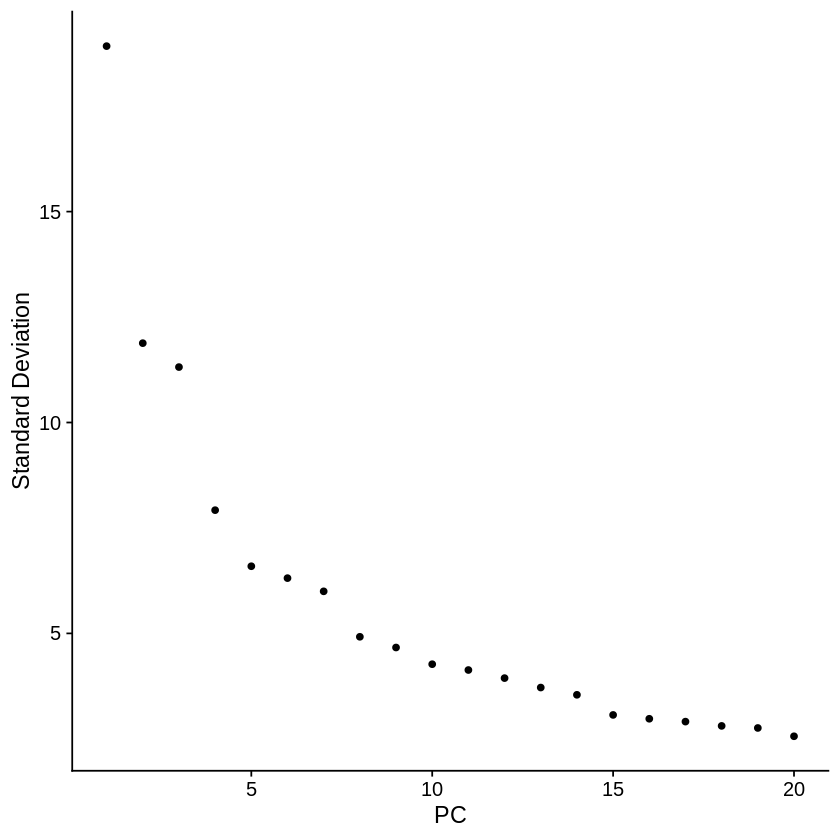

In [75]:
ElbowPlot(nuclei)

In [76]:
#redo umap
nuclei <- FindNeighbors(nuclei, k.param = 30,dims = 1:30)
nuclei <- FindClusters(nuclei, resolution = 0.45)
nuclei <- RunUMAP(nuclei, dims = 1:30)
head(Idents(nuclei), 5)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 64592
Number of edges: 3998144

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9761
Number of communities: 42
Elapsed time: 31 seconds


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
23:47:30 UMAP embedding parameters a = 0.9922 b = 1.112

23:47:30 Read 64592 rows and found 30 numeric columns

23:47:30 Using Annoy for neighbor search, n_neighbors = 30

23:47:30 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

23:47:43 Writing NN index file to temp file /local/11191653/tmp/RtmpfH3rtt/file1d88603092a3

23:47:43 Searching Annoy index using 1 thread, search_k = 3000

23:48:07 Annoy recall = 100%

23:48:08 Commencing smooth kNN distance calibration using 1 thread

23:48:12

AAACCCAAGAGCGACT-1-0 AAACCCACAAATACAG-1-0 AAACCCACAAGGTTGG-1-0 
                   1                    8                   13 
AAACCCACACTGGATT-1-0 AAACCCAGTCTAACGT-1-0 
                   8                    5 
42 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... 41

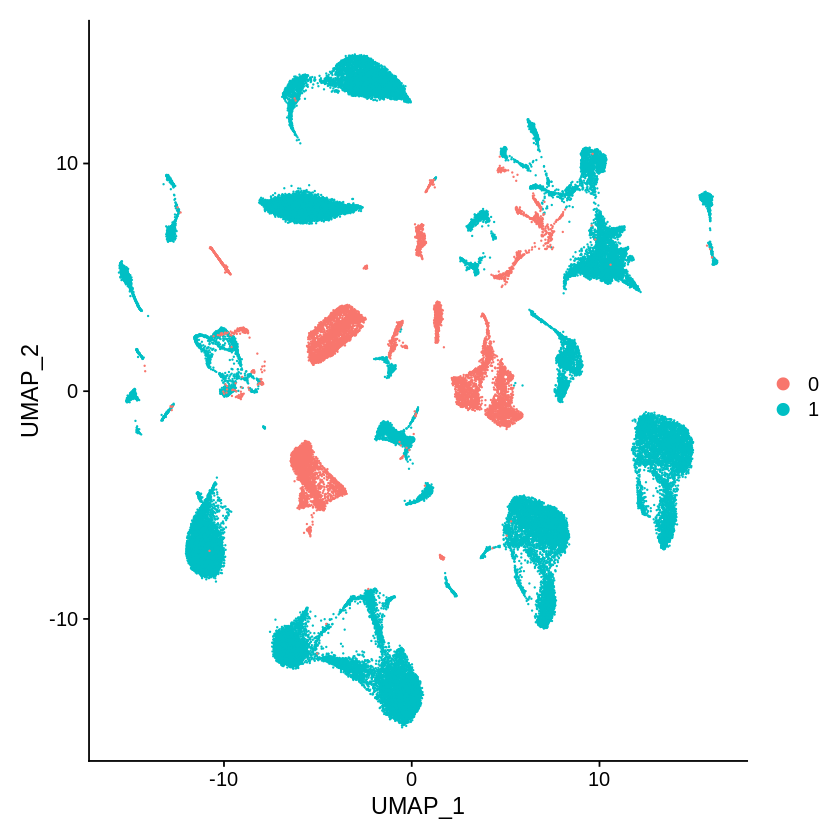

In [77]:
DimPlot(nuclei, reduction = "umap",group.by="tech")

In [78]:
pancreas.list <- SplitObject(nuclei, split.by = "tech")

In [79]:
pancreas.list <- pancreas.list[c("0", "1")]

In [80]:
for (i in 1:length(pancreas.list)) {
    pancreas.list[[i]] <- NormalizeData(pancreas.list[[i]], verbose = FALSE)
    pancreas.list[[i]] <- FindVariableFeatures(pancreas.list[[i]], selection.method = "vst", 
        nfeatures = 7000, verbose = FALSE)
}

In [81]:
reference.list <- pancreas.list[c("0", "1")]
pancreas.anchors <- FindIntegrationAnchors(object.list = reference.list, dims = 1:30)

Computing 2000 integration features

Scaling features for provided objects

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 28397 anchors

Filtering anchors

	Retained 4943 anchors



In [82]:
pancreas.integrated <- IntegrateData(anchorset = pancreas.anchors, dims = 1:30)

Merging dataset 1 into 2

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Warning message:
“Adding a command log without an assay associated with it”


In [83]:
library(ggplot2)
library(cowplot)
library(patchwork)
# switch to integrated assay. The variable features of this assay are automatically
# set during IntegrateData
DefaultAssay(pancreas.integrated) <- "integrated"

# Run the standard workflow for visualization and clustering
pancreas.integrated <- ScaleData(pancreas.integrated, verbose = FALSE)
pancreas.integrated <- RunPCA(pancreas.integrated, npcs = 30, verbose = FALSE)
pancreas.integrated <- RunUMAP(pancreas.integrated, reduction = "pca", dims = 1:30)


********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************



Attaching package: ‘cowplot’


The following object is masked from ‘package:patchwork’:

    align_plots


00:01:44 UMAP embedding parameters a = 0.9922 b = 1.112

00:01:44 Read 64592 rows and found 30 numeric columns

00:01:44 Using Annoy for neighbor search, n_neighbors = 30

00:01:44 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

00:02:00 Writing NN index file to temp file /local/11191653/tmp/RtmpfH3rtt/file1d884c800eff

00:02:00 Searching Annoy index using 1 thread, search_k = 3000

0

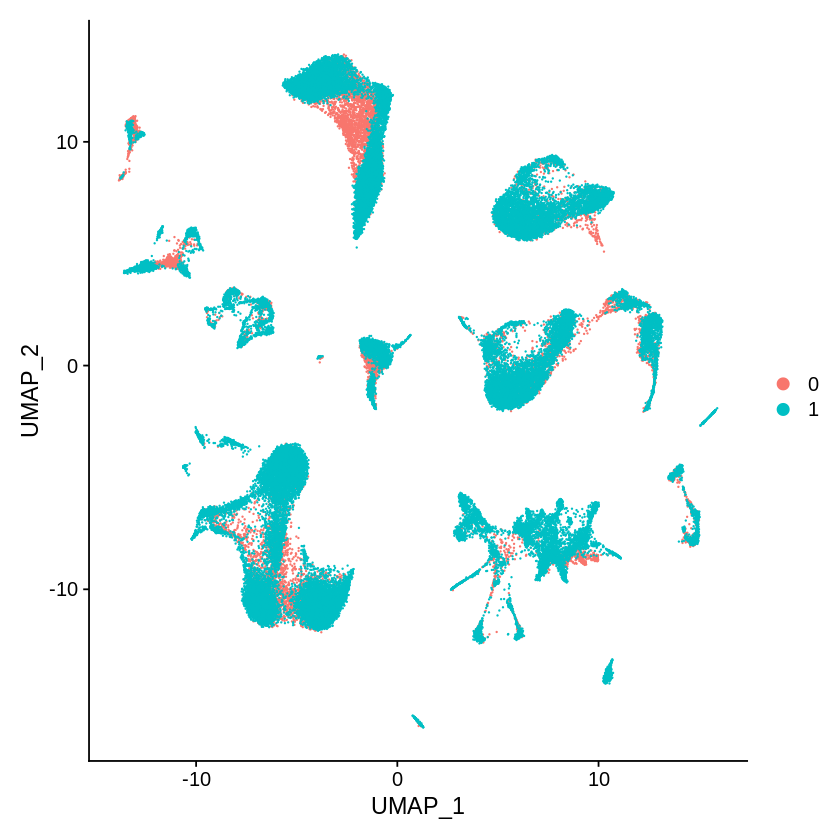

In [84]:
DimPlot(pancreas.integrated, reduction = "umap", group.by = "tech")
# p2 <- DimPlot(pancreas.integrated, reduction = "umap", group.by = "celltype", label = TRUE, 
#     repel = TRUE) + NoLegend()
# p1 + p2

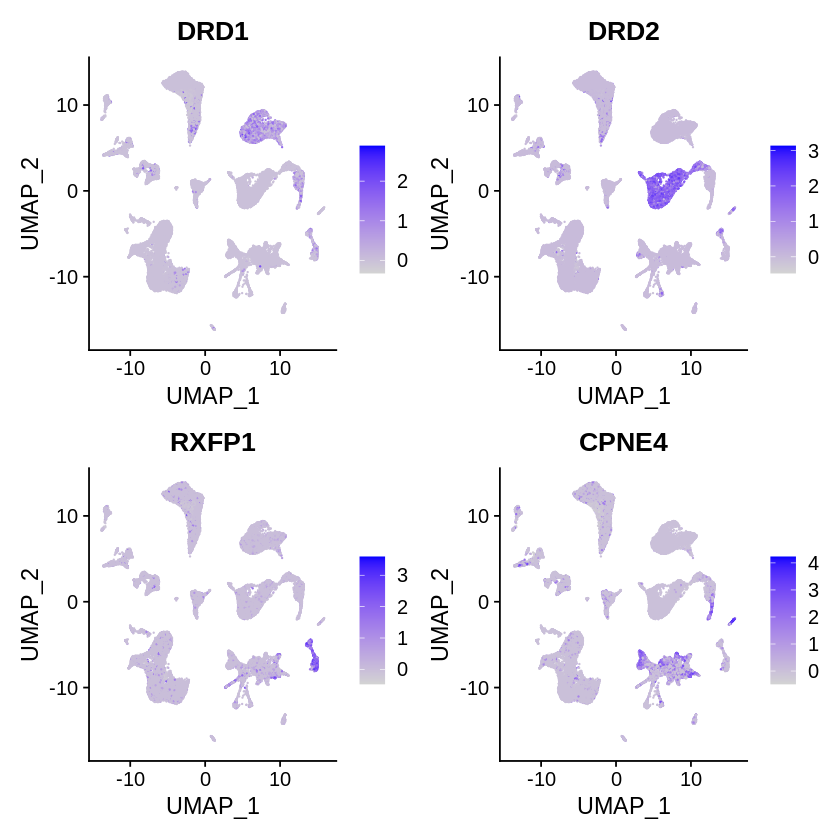

In [85]:
FeaturePlot(pancreas.integrated,features=c("DRD1","DRD2","RXFP1","CPNE4"))

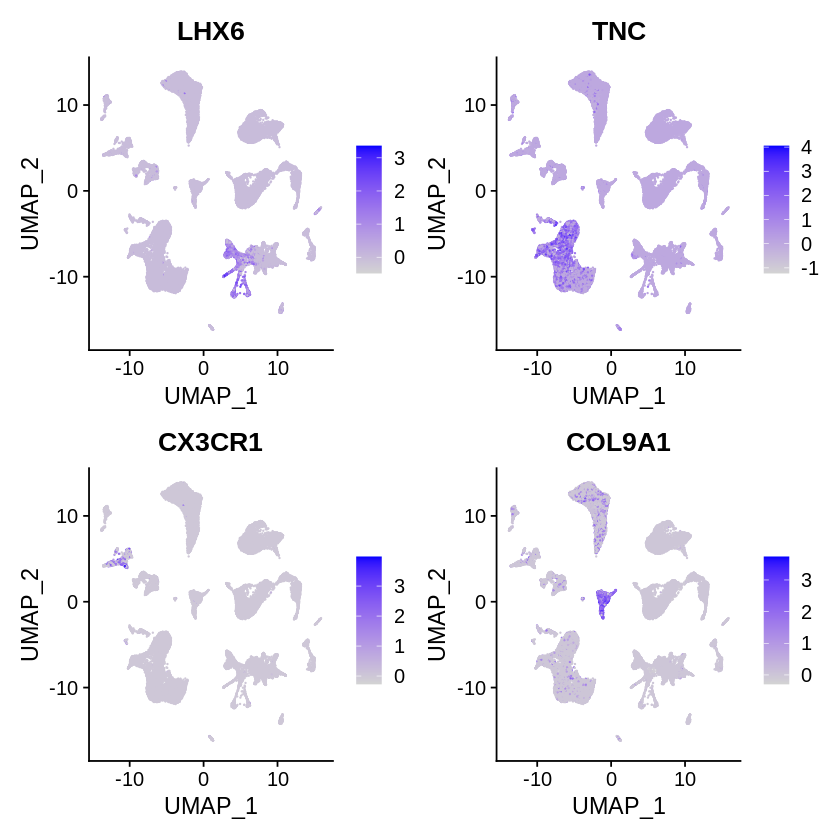

In [86]:
FeaturePlot(pancreas.integrated,features=c("LHX6","TNC","CX3CR1","COL9A1"))

Warning message:
“Could not find ASPA in the default search locations, found in RNA assay instead”


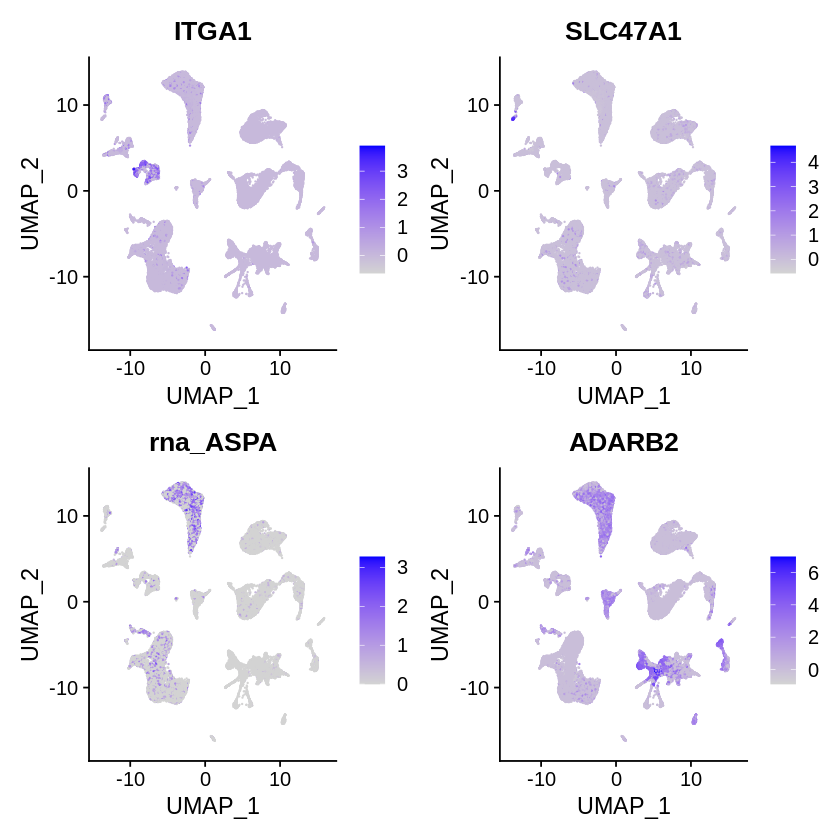

In [87]:
FeaturePlot(pancreas.integrated,features=c("ITGA1","SLC47A1","ASPA","ADARB2"))

Warning message:
“Could not find CHAT in the default search locations, found in RNA assay instead”


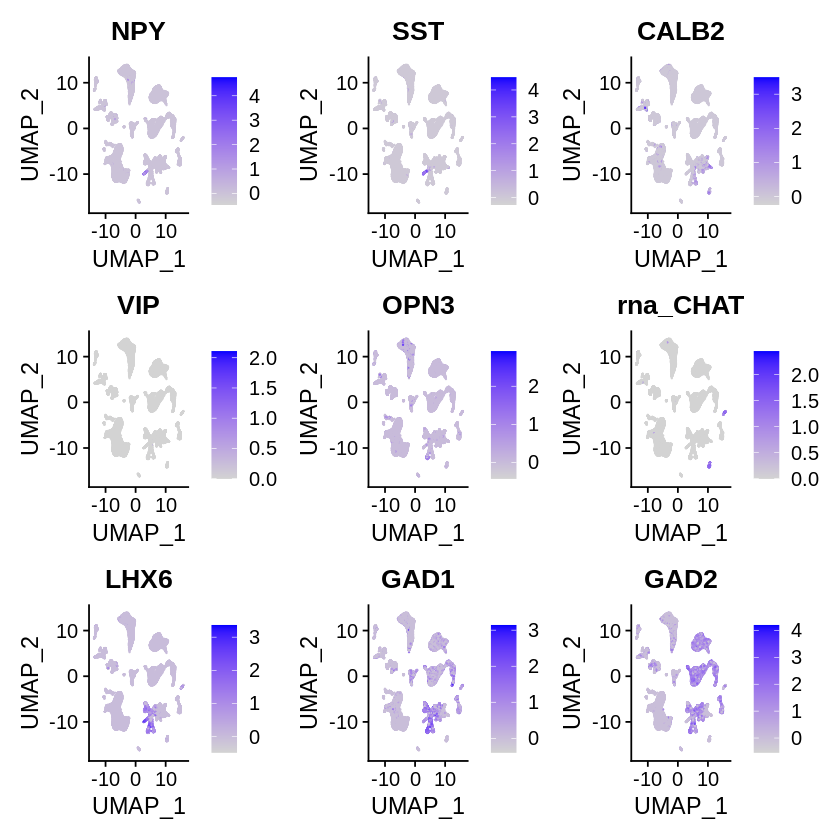

In [88]:
#NPY, SST, CALB2, VIP, PTHLH, OPN3, CHAT, LHX6, GAD1, GAD2
FeaturePlot(pancreas.integrated,features=c("NPY","SST","CALB2","VIP","OPN3","CHAT","LHX6","GAD1","GAD2"))

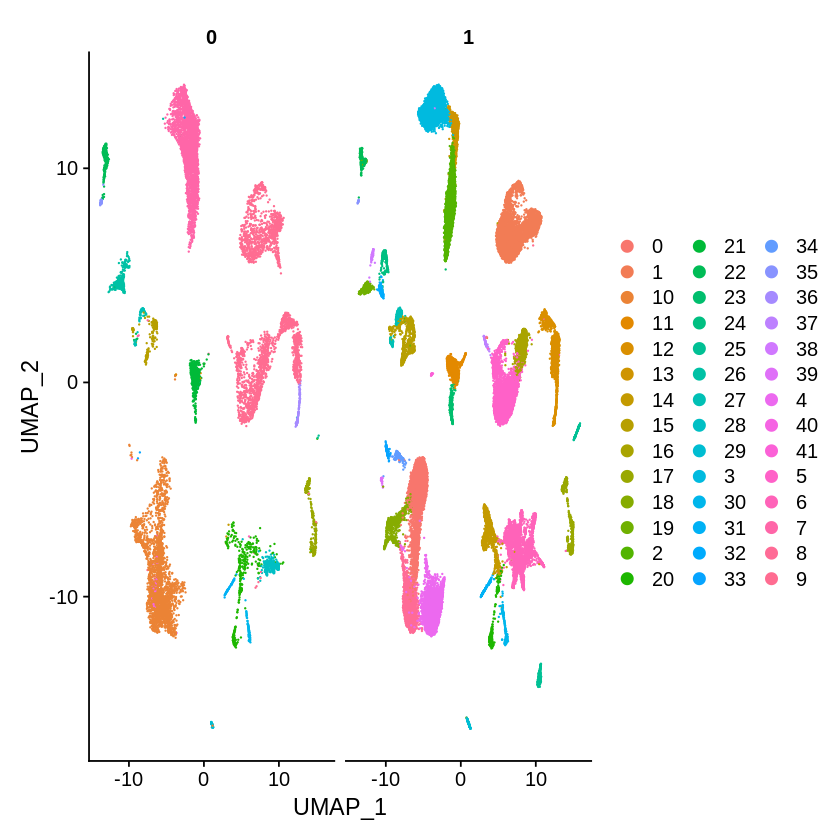

In [89]:
DimPlot(pancreas.integrated, reduction = "umap", split.by = "tech")

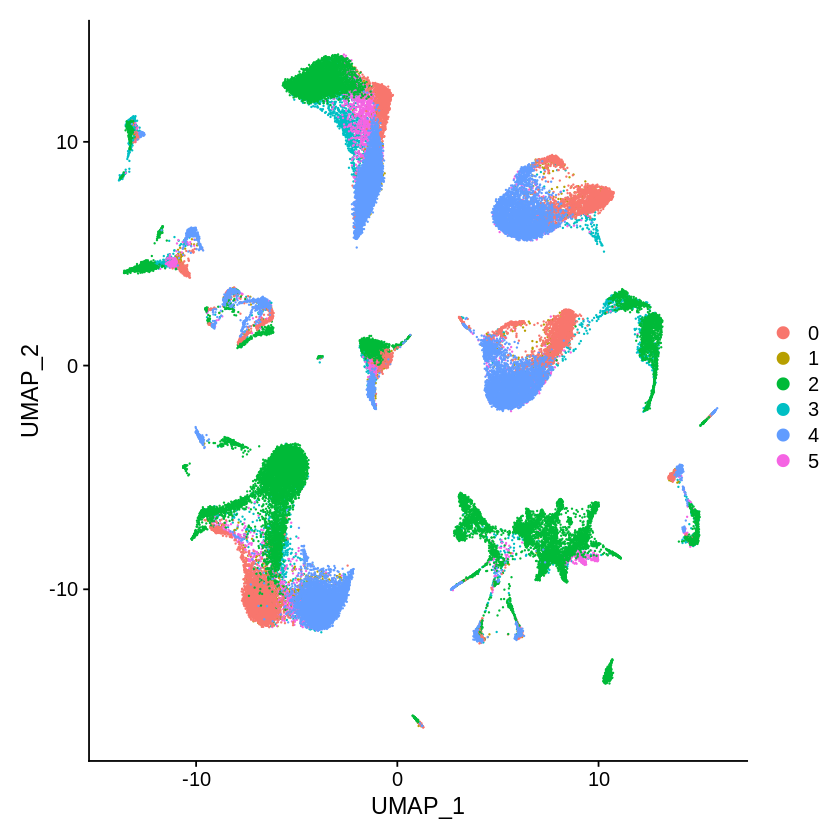

In [90]:
DimPlot(pancreas.integrated, reduction = "umap", group.by = "regions")

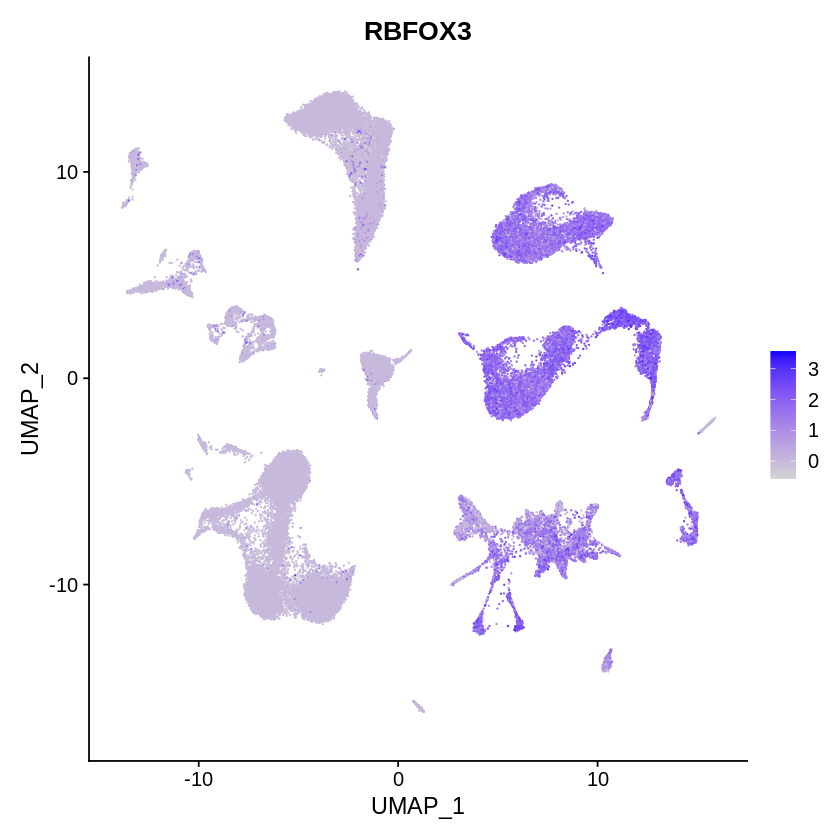

In [91]:
FeaturePlot(pancreas.integrated,features=c("RBFOX3"))

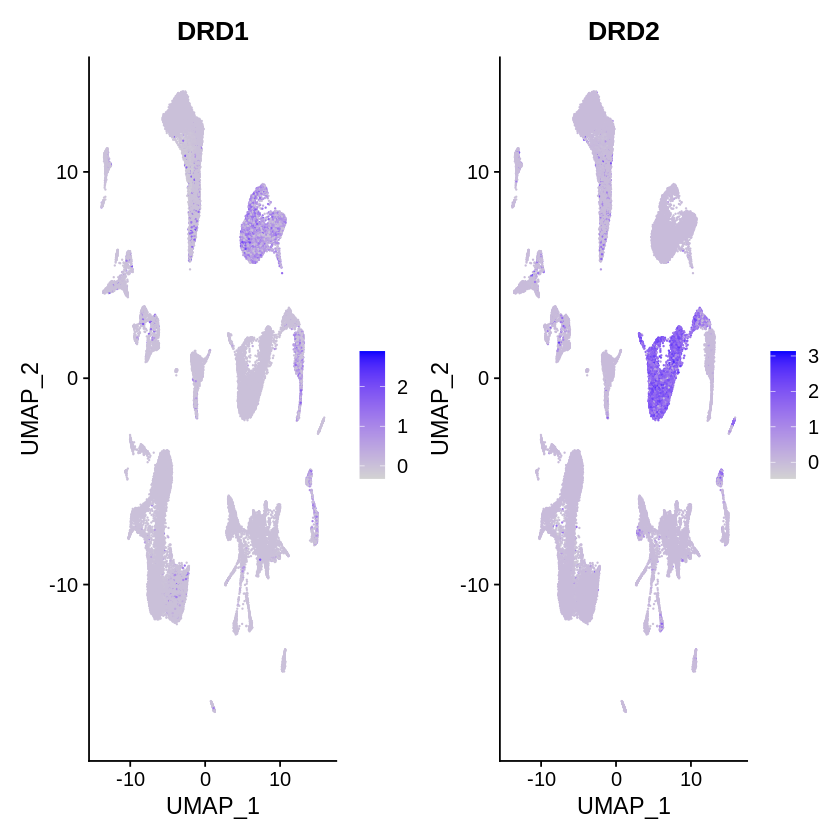

In [92]:
FeaturePlot(pancreas.integrated,features=c("DRD1","DRD2"))

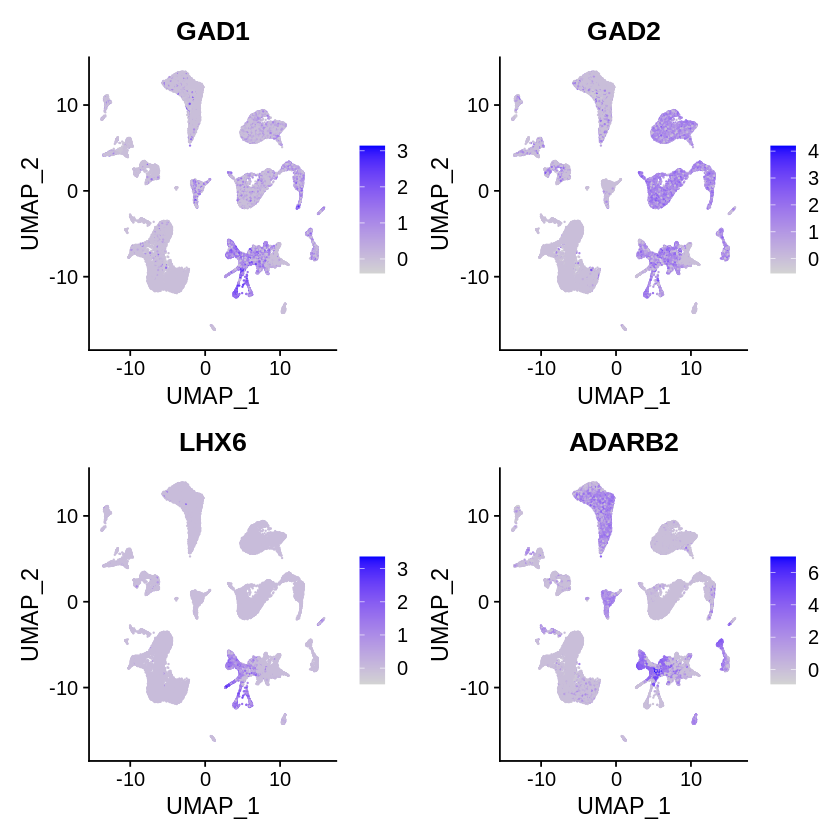

In [93]:
FeaturePlot(pancreas.integrated,features=c("GAD1","GAD2",'LHX6','ADARB2'))

In [94]:
pancreas.integrated <- FindNeighbors(pancreas.integrated, k.param = 30,dims = 1:30)

Computing nearest neighbor graph

Computing SNN



In [95]:
pancreas.integrated <- FindClusters(pancreas.integrated, resolution = 0.02)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 64592
Number of edges: 4021988

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9966
Number of communities: 11
Elapsed time: 38 seconds


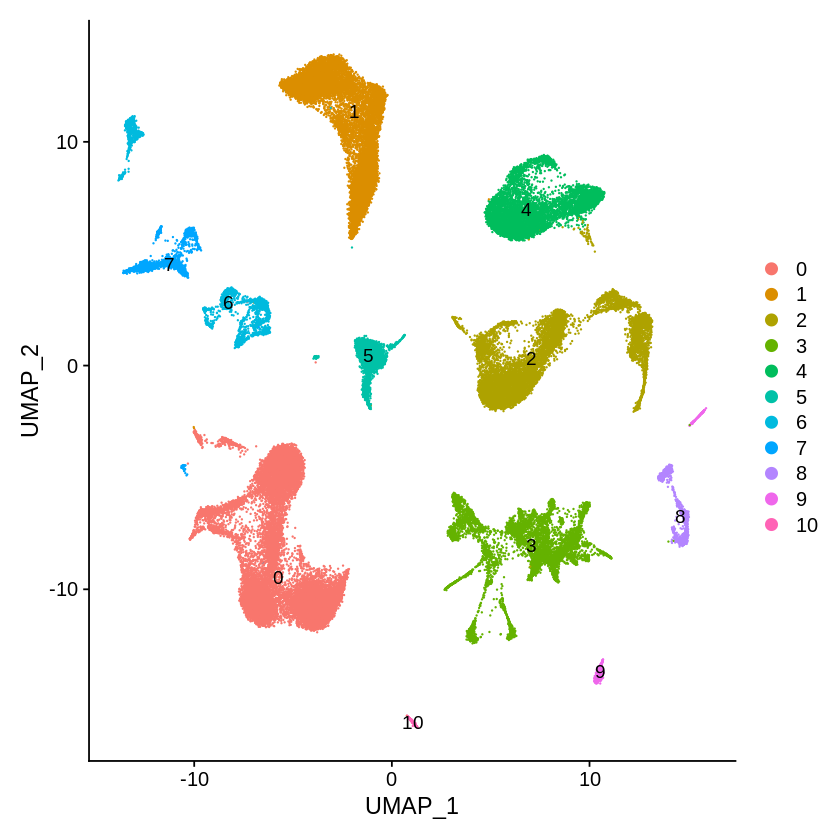

In [96]:
DimPlot(pancreas.integrated, group.by = "integrated_snn_res.0.02",label = TRUE) 

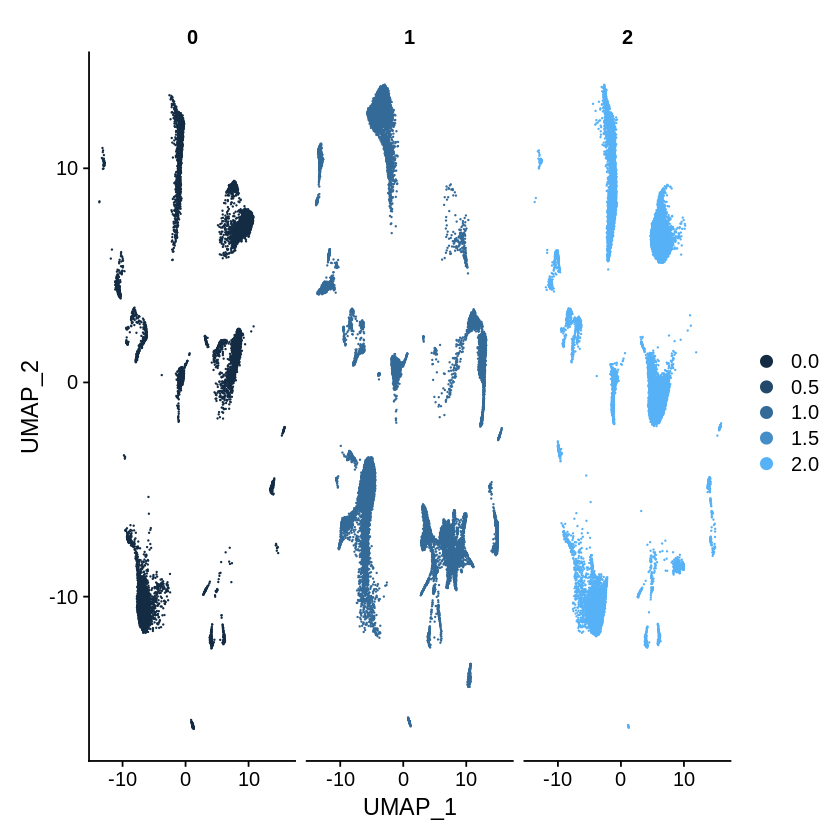

In [102]:
DimPlot(pancreas.integrated, reduction = "umap", group.by = "regions.2",split.by="regions.2")

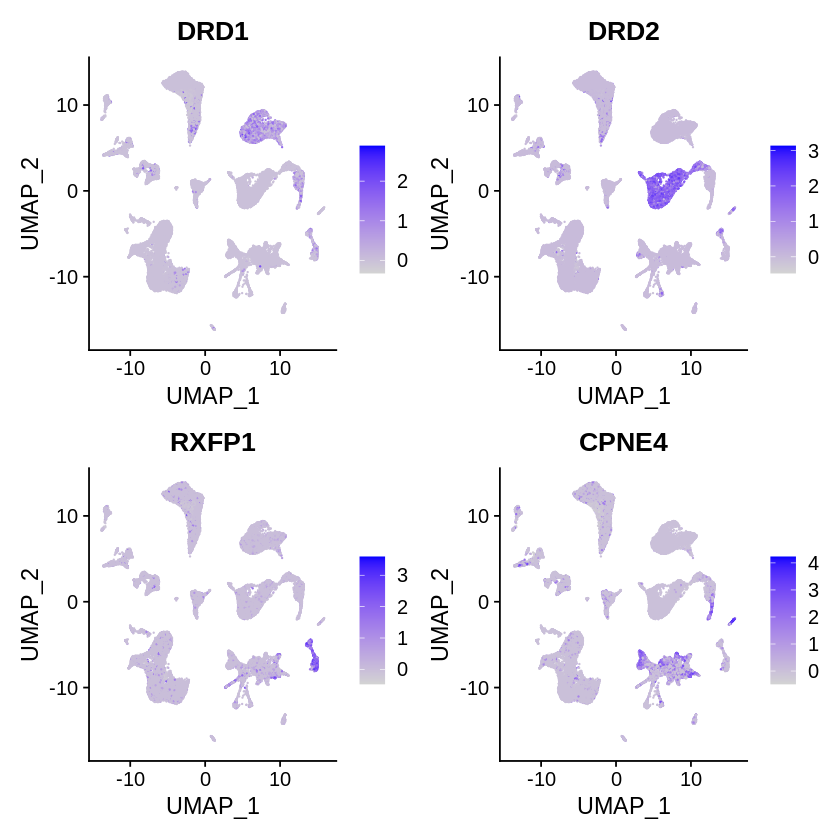

Warning message:
“Could not find ASPA in the default search locations, found in RNA assay instead”


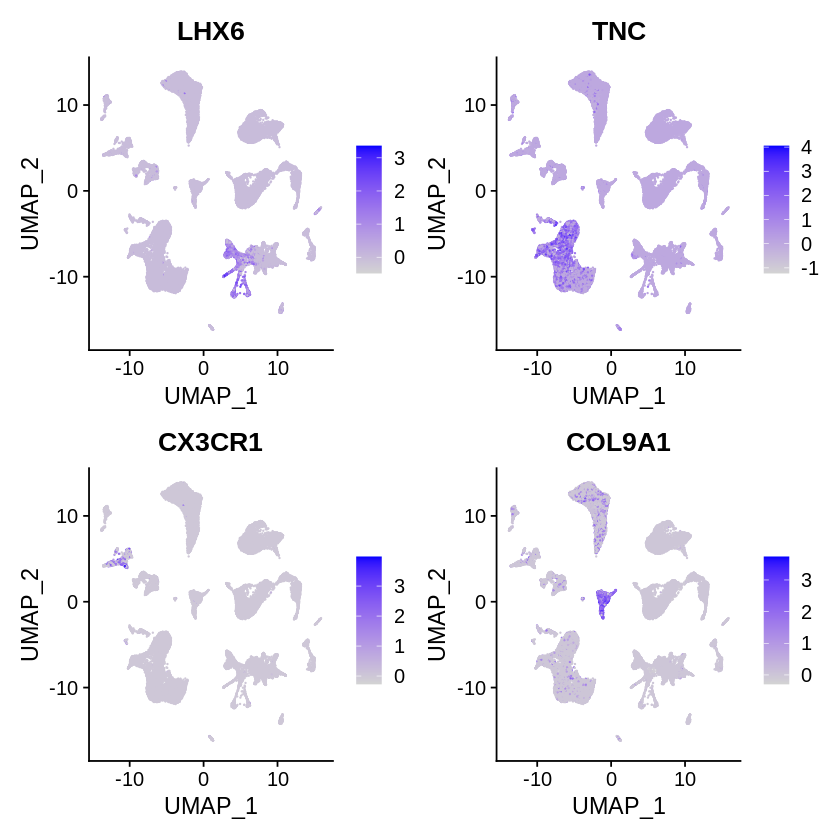

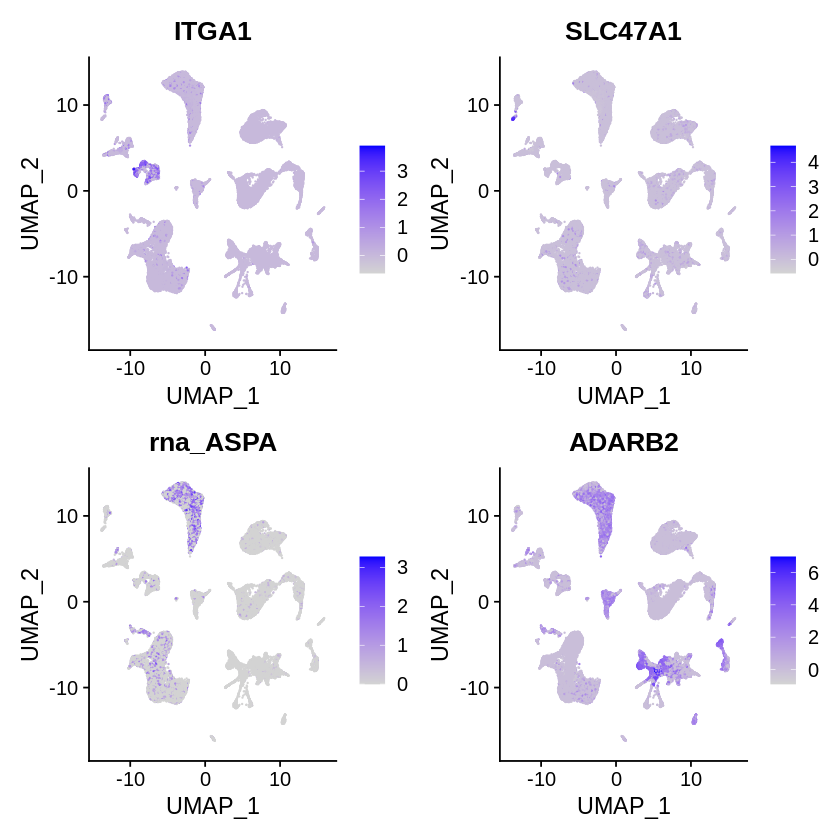

In [104]:
FeaturePlot(nuclei,features=c("DRD1","DRD2","RXFP1","CPNE4"))
FeaturePlot(nuclei,features=c("LHX6","TNC","CX3CR1","COL9A1"))
FeaturePlot(nuclei,features=c("ITGA1","SLC47A1","ASPA","ADARB2"))

In [105]:
FeaturePlot(nuclei,features=c("CRHR2"))


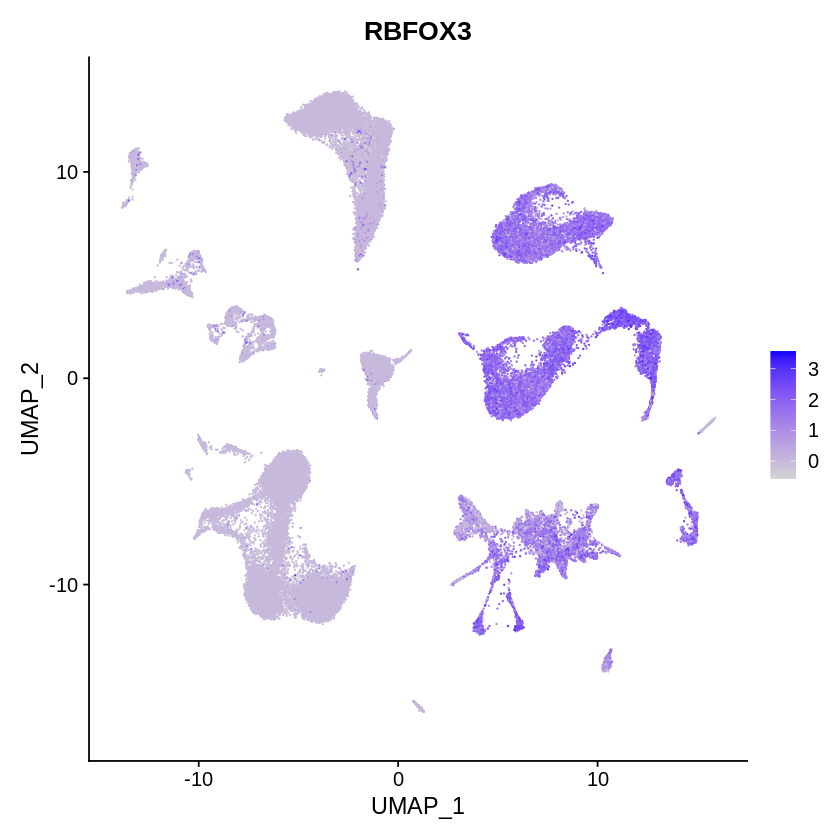

In [106]:
FeaturePlot(nuclei,features=c("RBFOX3"))


Warning message:
“Could not find CHAT in the default search locations, found in RNA assay instead”


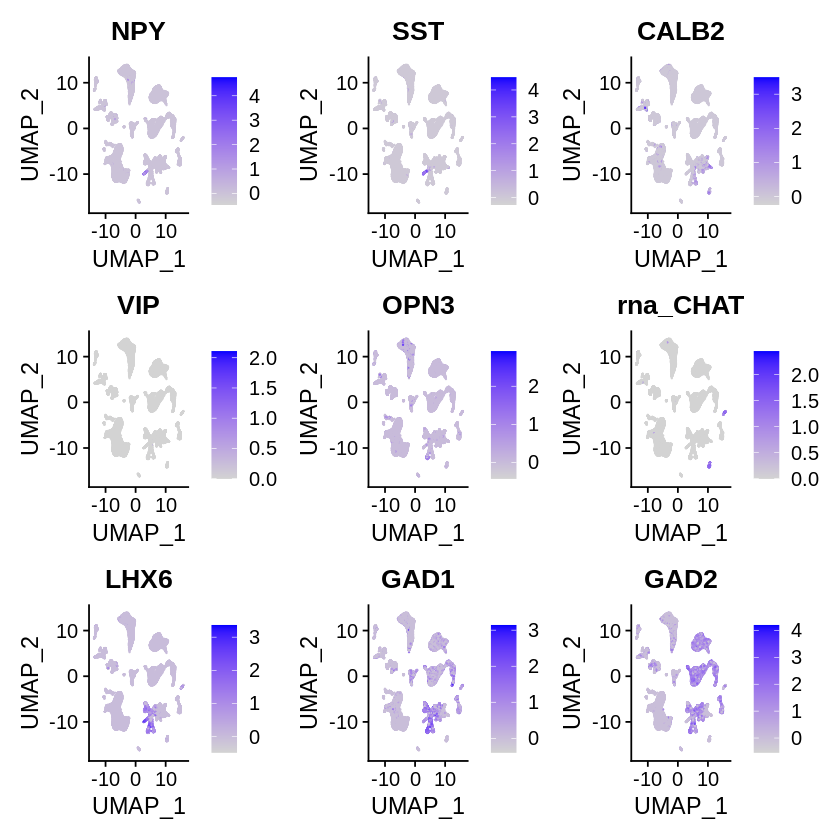

In [107]:
#NPY, SST, CALB2, VIP, PTHLH, OPN3, CHAT, LHX6, GAD1, GAD2
FeaturePlot(nuclei,features=c("NPY","SST","CALB2","VIP","OPN3","CHAT","LHX6","GAD1","GAD2"))

In [108]:
DimPlot(nuclei, reduction = "umap", split.by = "tech")

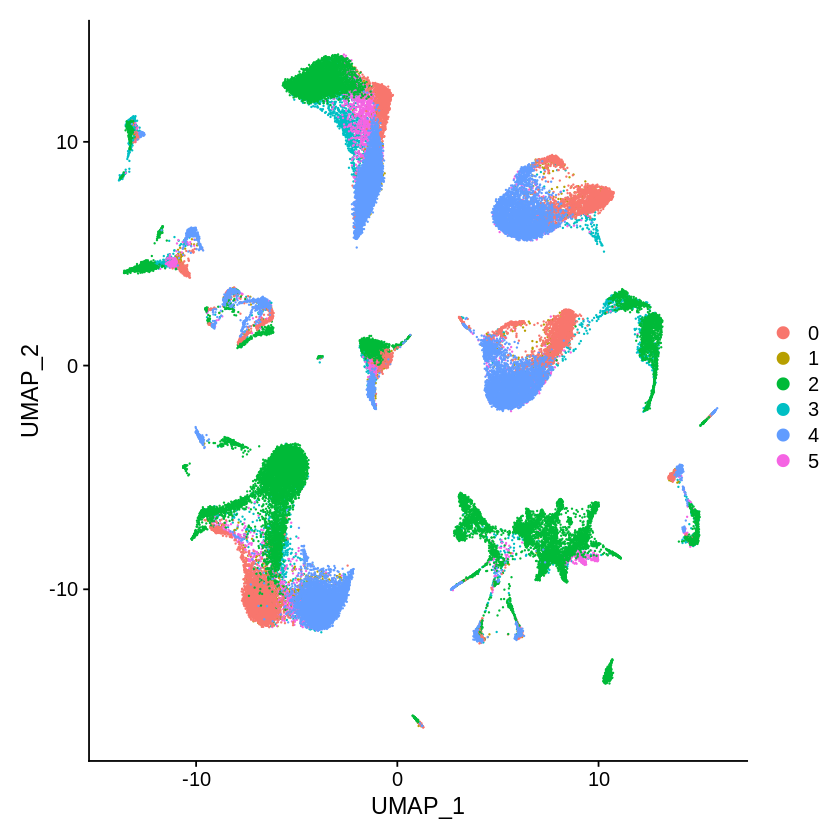

In [110]:
DimPlot(nuclei, reduction = "umap", group.by = "regions.1")
DimPlot(nuclei, reduction = "umap", group.by = "regions.2")

In [113]:
Idents(object = nuclei) <- 'regions.2'
nuclei <- RenameIdents(object = nuclei,'0' = 'caudate', '1' = 'nacc', '2' = 'putamen')
DimPlot(nuclei, reduction = "umap",pt.size = 0.5)
nuclei@meta.data$region_name = Idents(object = nuclei)
DimPlot(nuclei, reduction = "umap", group.by = "region_name")

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 64592
Number of edges: 4021988

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9380
Number of communities: 44
Elapsed time: 34 seconds


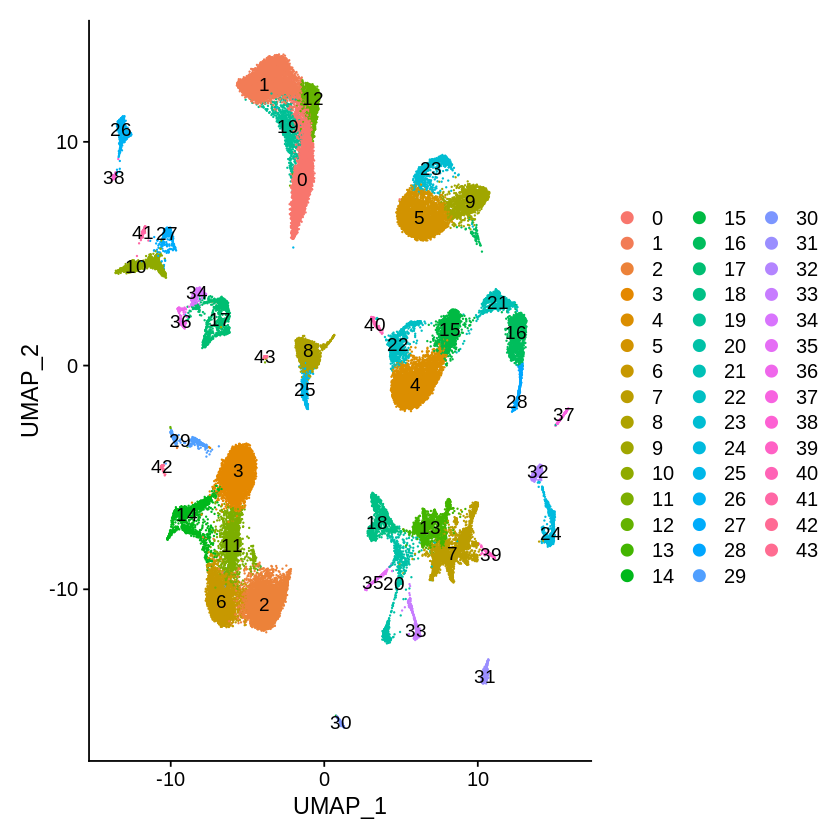

In [114]:
#nuclei <- FindNeighbors(nuclei, k.param = 30,dims = 1:30)
nuclei <- FindClusters(nuclei, resolution = 1.0)
DimPlot(nuclei, group.by = "integrated_snn_res.1",label = TRUE) 

In [115]:
Idents(object = nuclei) <- 'integrated_snn_res.1'
nuclei <- RenameIdents(object = nuclei,'0' = 'Oligos', '1' = 'Oligos', '2' = 'Astrocytes','3' = 'Astrocytes', '4' = 'DRD2', '5' = 'DRD1','6' = 'Astrocytes', '7' = 'Interneurons', '8' = 'Oligos_Pre'
                       , '9' = 'DRD1', '10' = 'Microglia','11' = 'Astrocytes', '12' = 'Oligos', '13' = 'Interneurons','14' = 'Astrocytes', '15' = 'DRD2', '16' = 'DRD1'
                      , '17' = 'Endothelial', '18' = 'Interneurons','19' = 'Oligos', '20' = 'Interneurons', '21' = 'DRD2','22' = 'DRD2', '23' = 'DRD1', '24' = 'DRD1'
                      , '25' = 'Oligos_Pre', '26' = 'Mural/Fibroblast','27' = 'Microglia', '28' = 'DRD1','29'='Astrocytes','30'='Unknown1','31' = 'Interneurons','32' = 'DRD1', '33' = 'Interneurons', '34' = 'Endothelial'
                      , '35' = 'Interneurons', '36' = 'Endothelial','37' = 'Unknown2', '38' = 'Mural/Fibroblast', '39' = 'Interneurons','40' = 'DRD2', '41' = 'Microglia', '42' = 'Unknown3'
                      , '43' = 'Unknown4')
#we are not sure of the identities of the four small clusters.
nuclei <- SubsetData(object = nuclei, ident.remove = "Unknown1")
nuclei <- SubsetData(object = nuclei, ident.remove = "Unknown2")
nuclei <- SubsetData(object = nuclei, ident.remove = "Unknown3")
nuclei <- SubsetData(object = nuclei, ident.remove = "Unknown4")
DimPlot(nuclei, reduction = "umap",pt.size = 0.5)
nuclei@meta.data$cell_type = Idents(object = nuclei)
DimPlot(nuclei, reduction = "umap", group.by = "cell_type",label=TRUE)

Warning message:
“'SubsetData' is deprecated.
Use 'subset' instead.
See help("Deprecated")”
Warning message:
“'OldWhichCells' is deprecated.
Use 'WhichCells' instead.
See help("Deprecated")”
Warning message:
“'SubsetData' is deprecated.
Use 'subset' instead.
See help("Deprecated")”
Warning message:
“'OldWhichCells' is deprecated.
Use 'WhichCells' instead.
See help("Deprecated")”
Warning message:
“'SubsetData' is deprecated.
Use 'subset' instead.
See help("Deprecated")”
Warning message:
“'OldWhichCells' is deprecated.
Use 'WhichCells' instead.
See help("Deprecated")”
Warning message:
“'SubsetData' is deprecated.
Use 'subset' instead.
See help("Deprecated")”
Warning message:
“'OldWhichCells' is deprecated.
Use 'WhichCells' instead.
See help("Deprecated")”


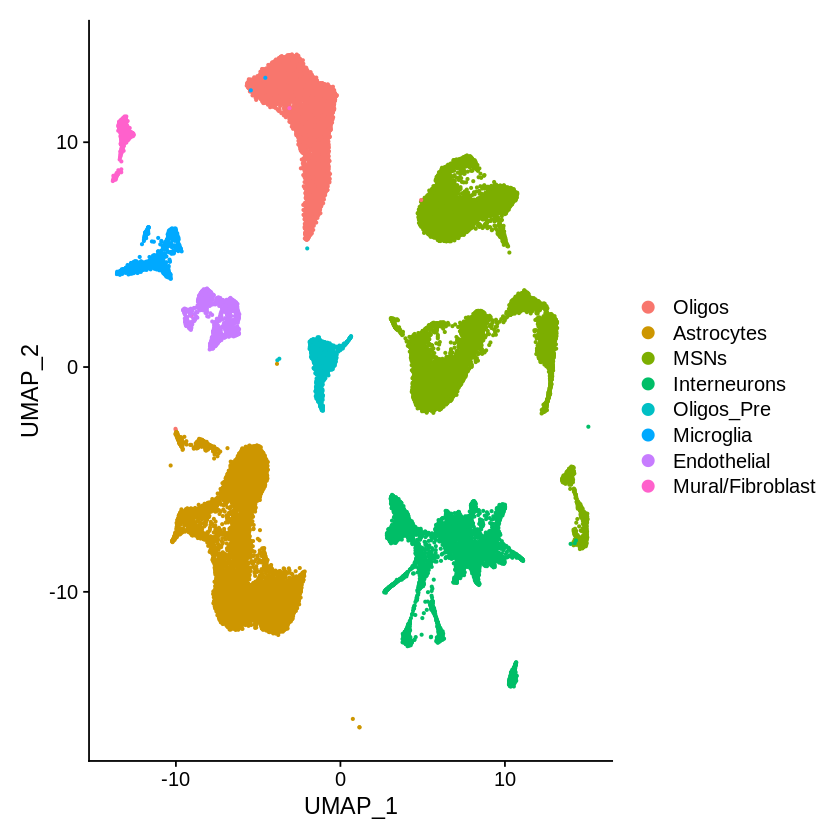

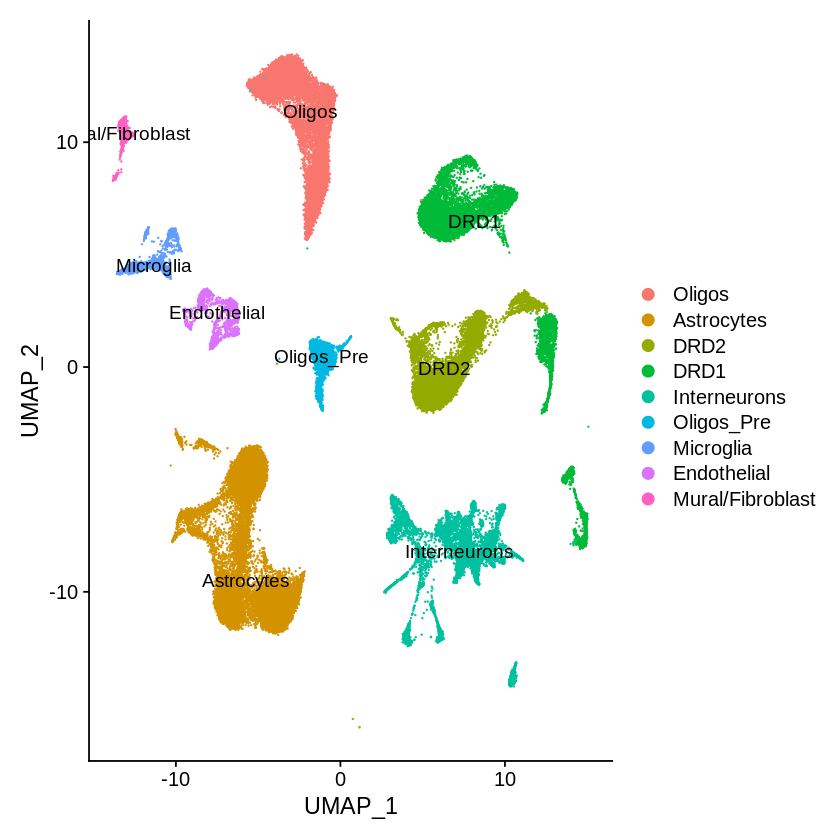

In [116]:
Idents(object = nuclei) <- 'integrated_snn_res.1'
nuclei <- RenameIdents(object = nuclei,'0' = 'Oligos', '1' = 'Oligos', '2' = 'Astrocytes','3' = 'Astrocytes', '4' = 'MSNs', '5' = 'MSNs','6' = 'Astrocytes', '7' = 'Interneurons', '8' = 'Oligos_Pre'
                       , '9' = 'MSNs', '10' = 'Microglia','11' = 'Astrocytes', '12' = 'Oligos', '13' = 'Interneurons','14' = 'Astrocytes', '15' = 'MSNs', '16' = 'MSNs'
                      , '17' = 'Endothelial', '18' = 'Interneurons','19' = 'Oligos', '20' = 'Interneurons', '21' = 'MSNs','22' = 'MSNs', '23' = 'MSNs', '24' = 'MSNs'
                      , '25' = 'Oligos_Pre', '26' = 'Mural/Fibroblast','27' = 'Microglia', '28' = 'MSNs','29'='Astrocytes','31' = 'Interneurons','32' = 'MSNs', '33' = 'Interneurons', '34' = 'Endothelial'
                      , '35' = 'Interneurons', '36' = 'Endothelial','38' = 'Mural/Fibroblast', '39' = 'Interneurons','40' = 'MSNs', '41' = 'Microglia')
DimPlot(nuclei, reduction = "umap",pt.size = 0.5)
nuclei@meta.data$cell_type_2 = Idents(object = nuclei)
DimPlot(nuclei, reduction = "umap", group.by = "cell_type",label=TRUE)

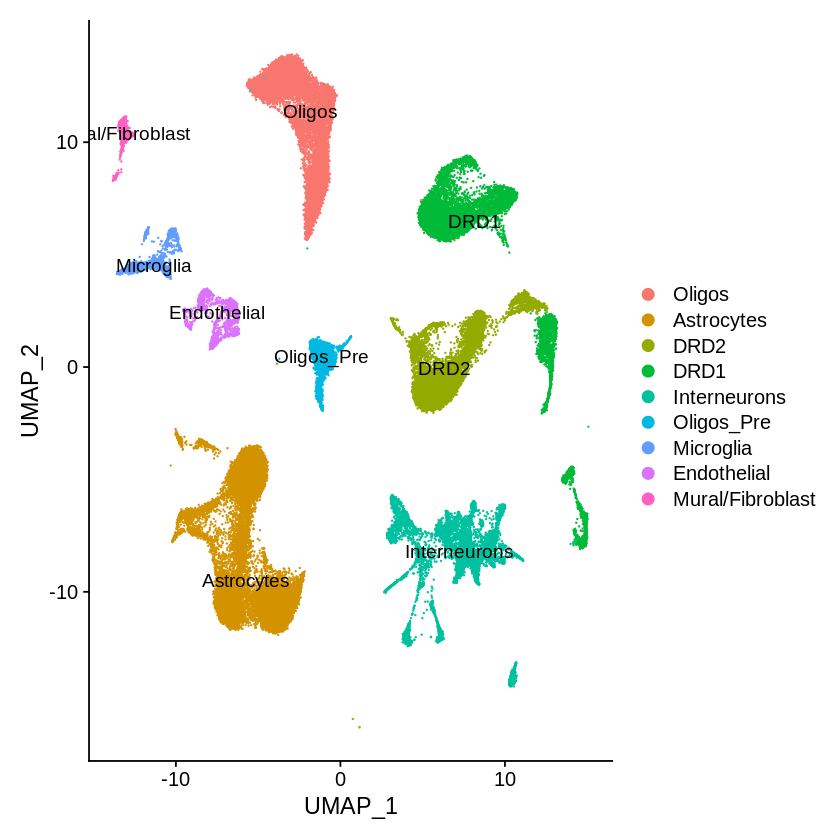

In [117]:
DimPlot(nuclei, reduction = "umap", group.by = "cell_type",label=TRUE)

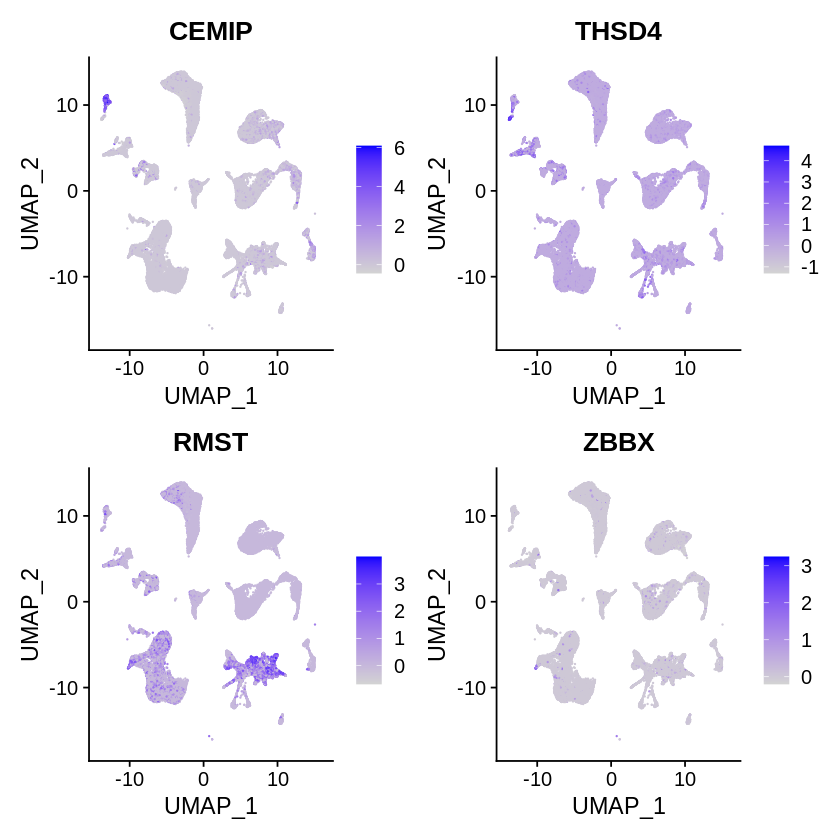

In [118]:
FeaturePlot(nuclei, features = c("CEMIP","THSD4","RMST","ZBBX"))

Warning message:
“Could not find CCDC153 in the default search locations, found in RNA assay instead”
Warning message:
“Could not find TM4SF1 in the default search locations, found in RNA assay instead”
Warning message:
“Could not find RARRES2 in the default search locations, found in RNA assay instead”


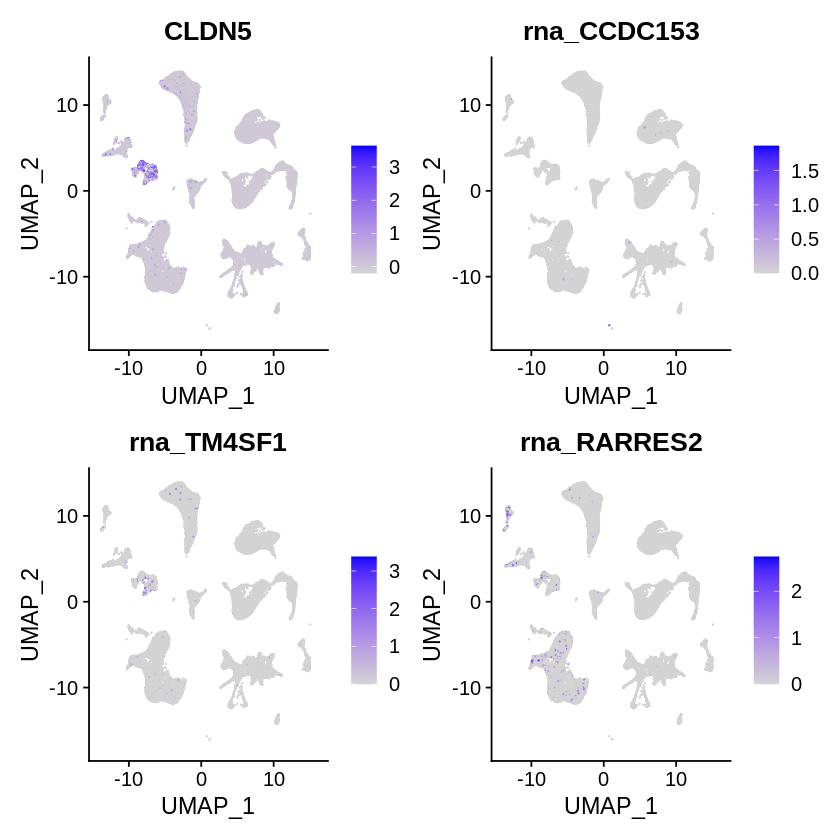

In [119]:
FeaturePlot(nuclei, features = c("CLDN5","CCDC153","TM4SF1","RARRES2"))


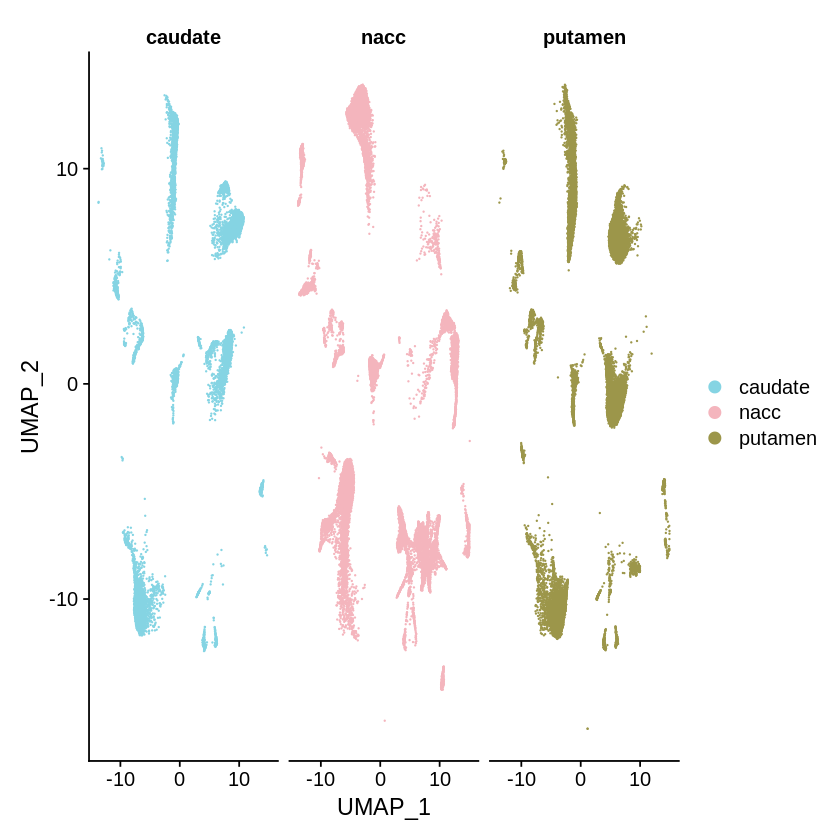

In [120]:
DimPlot(nuclei,  group.by = 'region_name',split.by='region_name',cols = wes_palette(name='Moonrise3'))
DimPlot(nuclei, group.by = 'region_name',cols = wes_palette(name='BottleRocket2'))
#DimPlot(nuclei,  group.by = "region_name", cols = brewer.pal(3,"Accent"))
DimPlot(nuclei,  group.by = "region_name", split.by='region_name',cols = brewer.pal(3,"Dark2"))
DimPlot(nuclei,  group.by = 'region_name',split.by = 'region_name',cols = wes_palette(name='BottleRocket2'))

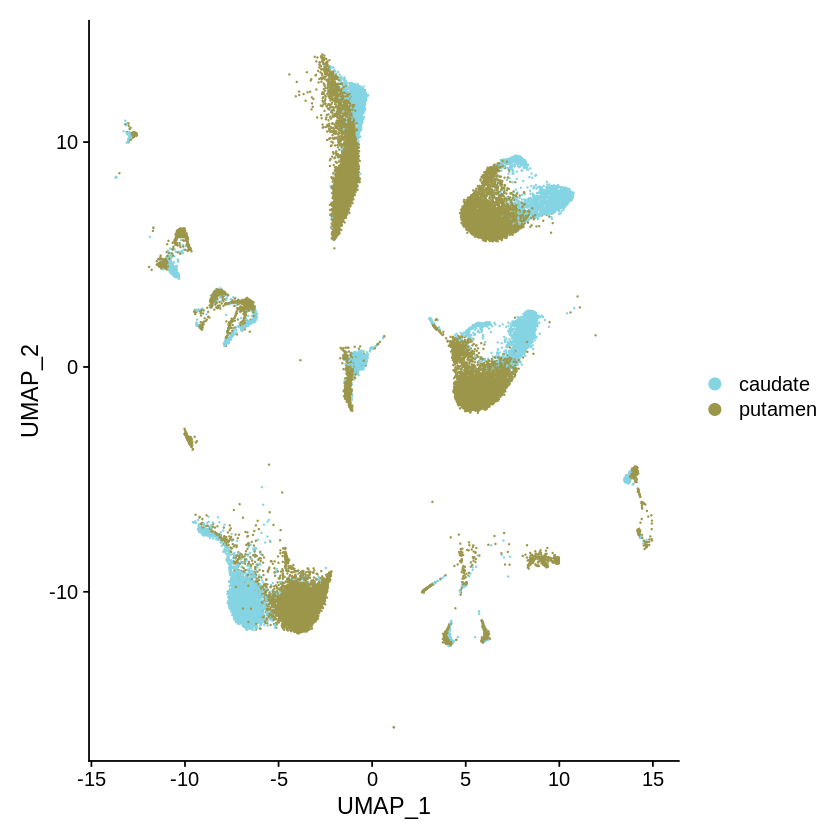

In [121]:
#dev.off()
#svg("figures/caudate_putamen.svg")
cd_pt = subset(nuclei, region_name!='nacc')
DimPlot(cd_pt,  group.by = 'region_name',cols = wes_palette(name='Moonrise3')[c(1,3)])

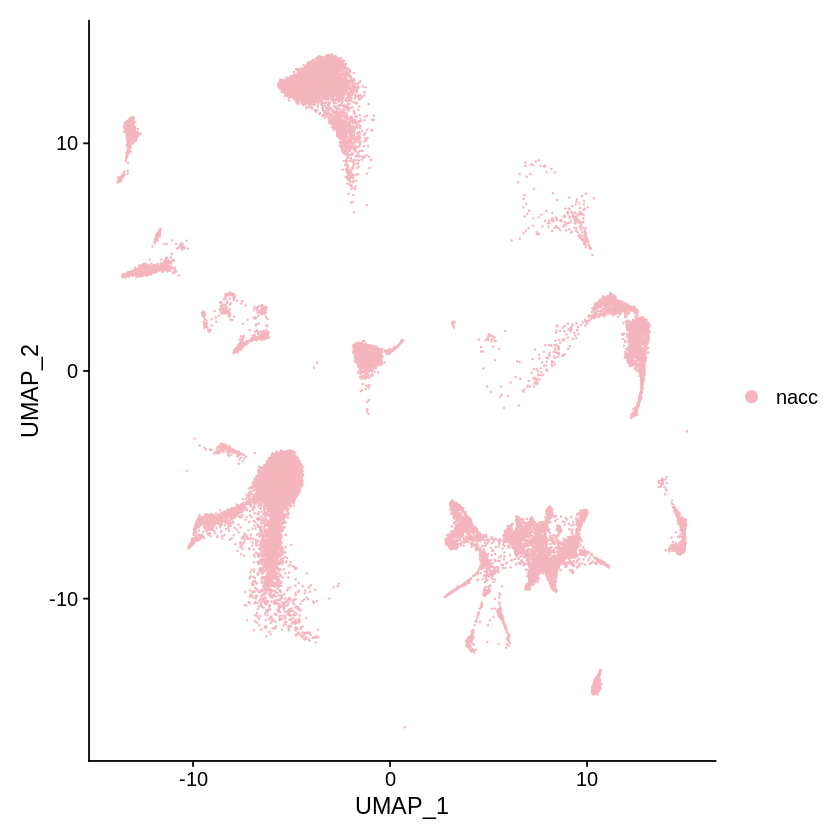

In [122]:
#dev.off()
#svg("figures/nacc.svg")
nacc = subset(nuclei, region_name=='nacc')
DimPlot(nacc,  group.by = 'region_name',cols = wes_palette(name='Moonrise3')[2])

In [123]:
unique(nuclei$cell_type)
unique(nuclei$cell_type_2)

[1] DRD1             Oligos           Microglia        Oligos_Pre      
[5] Astrocytes       DRD2             Mural/Fibroblast Endothelial     
[9] Interneurons    
13 Levels: Oligos Astrocytes DRD2 DRD1 Interneurons Oligos_Pre ... Unknown4

[1] MSNs             Oligos           Microglia        Oligos_Pre      
[5] Astrocytes       Mural/Fibroblast Endothelial      Interneurons    
8 Levels: Oligos Astrocytes MSNs Interneurons Oligos_Pre ... Mural/Fibroblast

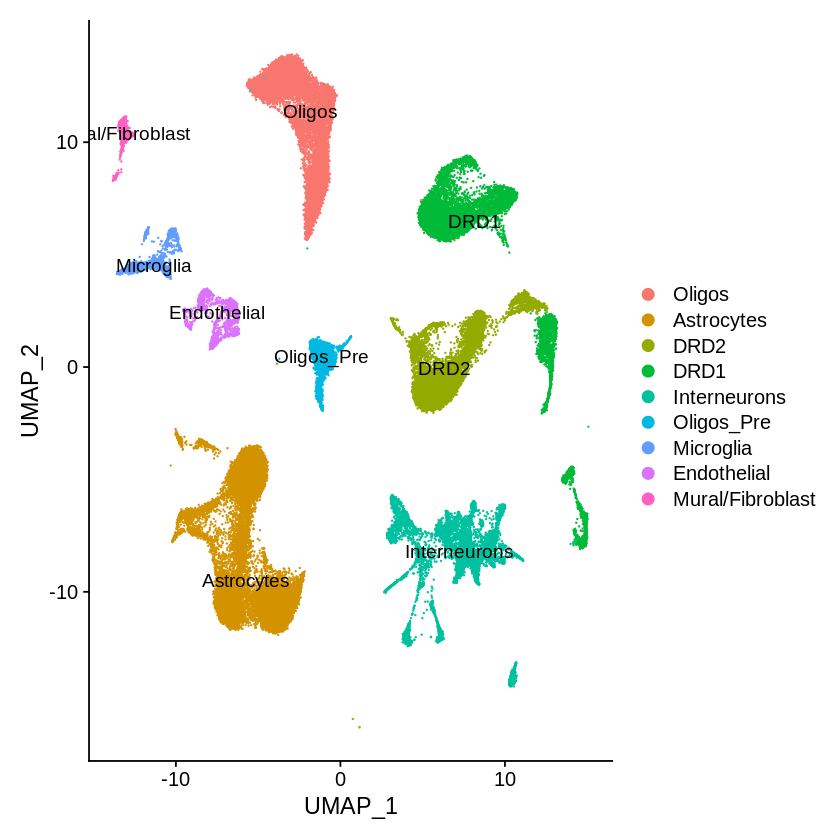

In [124]:
DimPlot(nuclei, reduction = "umap", group.by = "cell_type",label=TRUE)

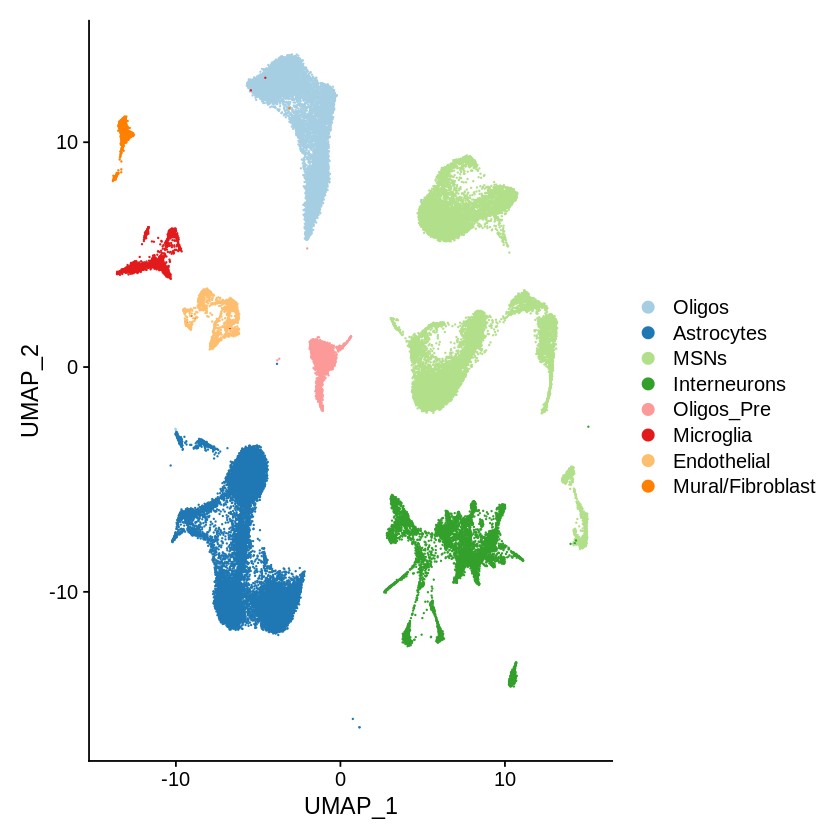

In [125]:
DimPlot(nuclei,reduction = "umap", group.by = "cell_type_2",cols = brewer.pal(8,"Paired"))

Warning message:
“Could not find ASPA in the default search locations, found in RNA assay instead”


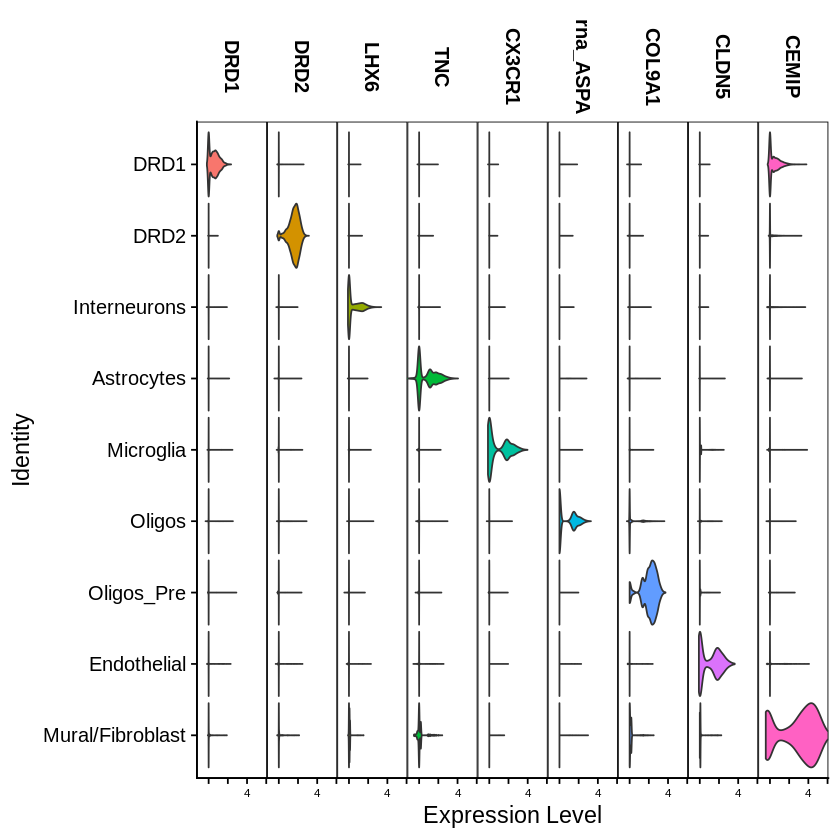

In [126]:
#Staked violin plot
nuclei_copy <- nuclei
Idents(object = nuclei_copy) <- 'cell_type'
Idents(object = nuclei) <- 'cell_type'
my_levels <- c('Mural/Fibroblast','Endothelial','Oligos_Pre','Oligos','Microglia','Astrocytes','Interneurons','DRD2','DRD1')
Idents(nuclei_copy) <- factor(Idents(nuclei_copy), levels= my_levels)
#dev.off()
#svg("figures/Stacked_violin.svg")

VlnPlot(nuclei_copy, features = c("DRD1","DRD2","LHX6","TNC","CX3CR1","ASPA","COL9A1","CLDN5","CEMIP"), 
        
        stack = TRUE, flip = FALSE, same.y.lims = TRUE)+ NoLegend()

In [127]:
##Feature Plots
#dev.off()
#svg("figures/RBFOX3.svg")
#DimPlot(nuclei,reduction = "umap", group.by = "cell_type_2",cols = brewer.pal(8,"Paired"))
FeaturePlot(nuclei, features = c("RBFOX3"))+scale_fill_gradientn(colors = brewer.pal(5,"Blues"))

In [128]:
length(unique(nuclei$cell_type))
table(nuclei$cell_type)

[1] 9


          Oligos       Astrocytes             DRD2             DRD1 
           14314            17424             7310             9148 
    Interneurons       Oligos_Pre        Microglia      Endothelial 
            7629             3079             2430             1723 
Mural/Fibroblast         Unknown1         Unknown2         Unknown3 
             827                0                0                0 
        Unknown4 
               0 

In [129]:
Idents(object = nuclei) <- 'cell_type_2'
my_levels <- c('MSNs','Interneurons','Astrocytes','Microglia','Oligos','Oligos_Pre','Endothelial','Mural/Fibroblast')

Idents(nuclei) <- factor(Idents(nuclei), levels= my_levels)
#nuclei.markers2 <- FindAllMarkers(nuclei, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
#write.csv(nuclei.markers2,"nuclei_all_markers_final2.csv")
nuclei.markers2 <- read.csv("nuclei_all_markers_final2.csv")

In [130]:
## heatmap
library(dplyr)
library(svglite)
top50 <- nuclei.markers2 %>% group_by(cluster) %>% top_n(n = 50, wt = avg_logFC)

# dev.off()
# svg("figures/heatmap_cell_type.png")

Idents(object = nuclei) <- 'cell_type_2'
my_levels <- c('MSNs','Interneurons','Astrocytes','Microglia','Oligos','Oligos_Pre','Endothelial','Mural/Fibroblast')
Idents(nuclei) <- factor(Idents(nuclei), levels= my_levels)

plot <- DoHeatmap(subset(nuclei, downsample = 200), features = top50$gene, disp.min = -2, disp.max = 2, group.colors = brewer.pal(8,"Paired")) +scale_fill_gradientn(colors = brewer.pal(8,"PuOr"))
ggplot2::ggsave(filename = "figures/heatmap_cell_type_3.png", plot = plot)

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.

Saving 6.67 x 6.67 in image

